In [1]:

import pandas as pd
import DecisionBoundry 
import contour
import numpy as np

In [2]:

df=pd.read_csv('NLS_Group01.csv').drop('Unnamed: 0',axis=1)
df

,x1,x2,Class
0,-0.380352,-0.390977,1
1,-0.416680,0.214674,1
2,-0.974757,0.263573,1
3,-1.129312,-0.387884,1
4,1.054486,-0.333915,1
...,...,...,...
1795,4.221331,-0.045618,3
1796,4.483162,2.921077,3
1797,-0.524097,3.659981,3
1798,-3.563939,-4.183029,3


In [18]:
mean=np.mean(df[df['Class']==3][['x1','x2']].values,axis=0)
mean

array([0.50636109, 0.49426507])

In [4]:

db=DecisionBoundry.decisionBoundry(df,'Class',['x1','x2'])

In [5]:
cov_matrices = [
    np.cov(df[df['Class']==1]['x1'],df[df['Class']==1]['x2']),
    np.cov(df[df['Class']==2]['x1'],df[df['Class']==2]['x2']),
    np.cov(df[df['Class']==3]['x1'],df[df['Class']==3]['x2'])
  ]

In [6]:
for idx, matrix in enumerate(cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[ 0.35940393 -0.03661739]
 [-0.03661739  0.39969767]]

Updated Covariance Matrix 2:
[[2.2266309  0.00678095]
 [0.00678095 0.47206954]]

Updated Covariance Matrix 3:
[[10.24567039  0.1781524 ]
 [ 0.1781524  11.19403564]]



/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/DecisionBoundry.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


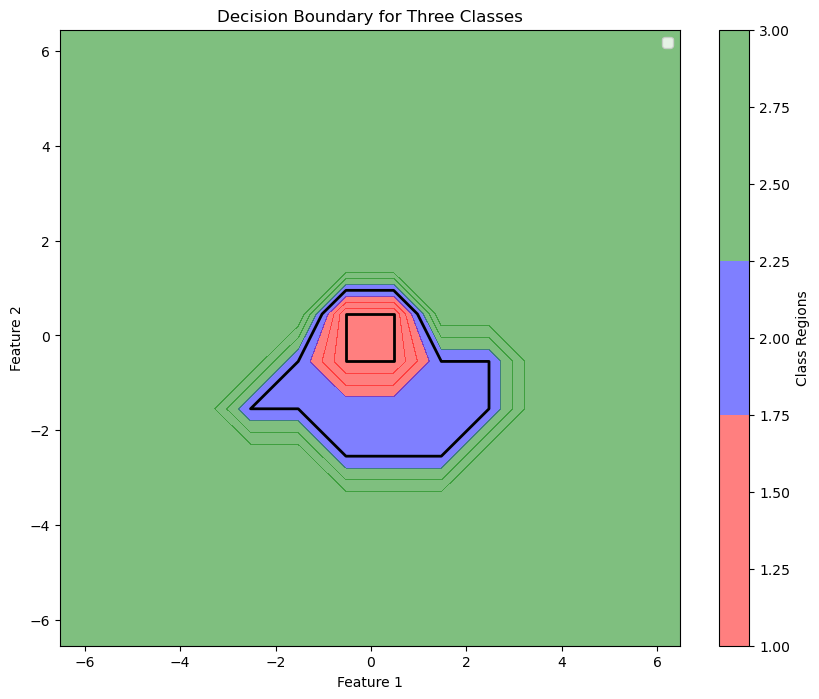

In [7]:

db.plot_decision(df[['x1','x2']])

In [8]:


z_cov_matrices=[]
for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    diag = np.diag(np.diag(cov_matrix))  
    z_cov_matrices.append(diag)
for idx, matrix in enumerate(z_cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[0.35940393 0.        ]
 [0.         0.39969767]]

Updated Covariance Matrix 2:
[[2.2266309  0.        ]
 [0.         0.47206954]]

Updated Covariance Matrix 3:
[[10.24567039  0.        ]
 [ 0.         11.19403564]]



In [9]:
d_cov_matrices = []

for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    value=cov_matrix[0,0]
    diag = np.array([
        [value, 0],
        [0, value]
    ])  # Create the diagonal matrix with variance_x1
    d_cov_matrices.append(diag)

for idx, matrix in enumerate(d_cov_matrices):
    print(f"Updated Covariance Matrix {idx + 1}:\n{matrix}\n")


Updated Covariance Matrix 1:
[[0.35940393 0.        ]
 [0.         0.35940393]]

Updated Covariance Matrix 2:
[[2.2266309 0.       ]
 [0.        2.2266309]]

Updated Covariance Matrix 3:
[[10.24567039  0.        ]
 [ 0.         10.24567039]]



In [10]:

c=contour.decisionBoundary(df,'Class',['x1','x2'])

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


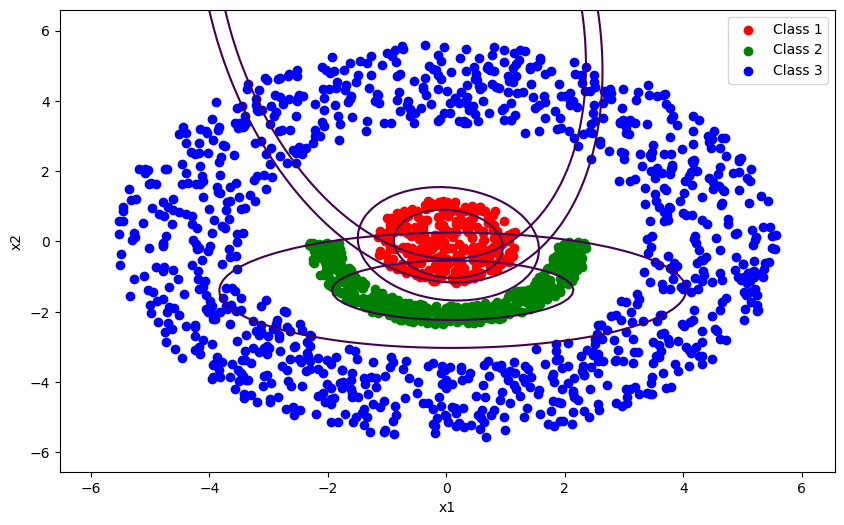

In [11]:

p1=c.plot_decision_boundaries_with_cov(cov_matrices,False)
p1

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


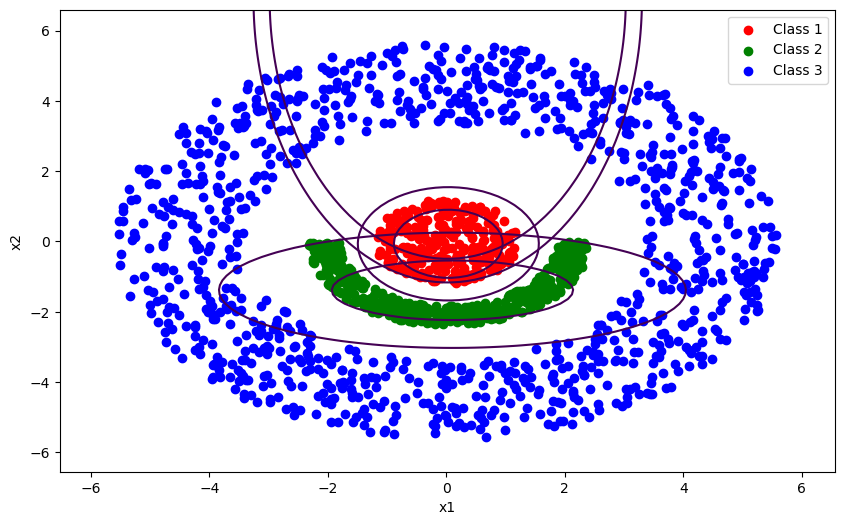

In [12]:

p3=c.plot_decision_boundaries_with_cov(z_cov_matrices,False)
p3

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


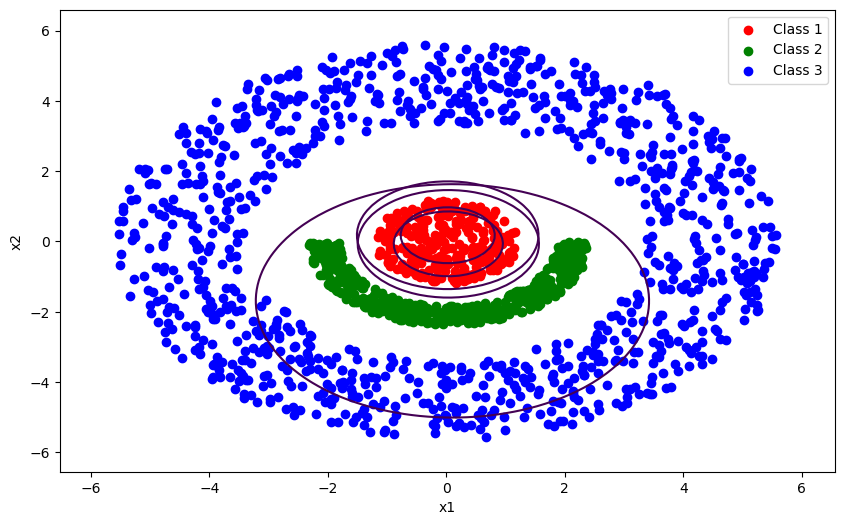

In [13]:

p5=c.plot_decision_boundaries_with_cov(d_cov_matrices,False)
p5

            
            

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


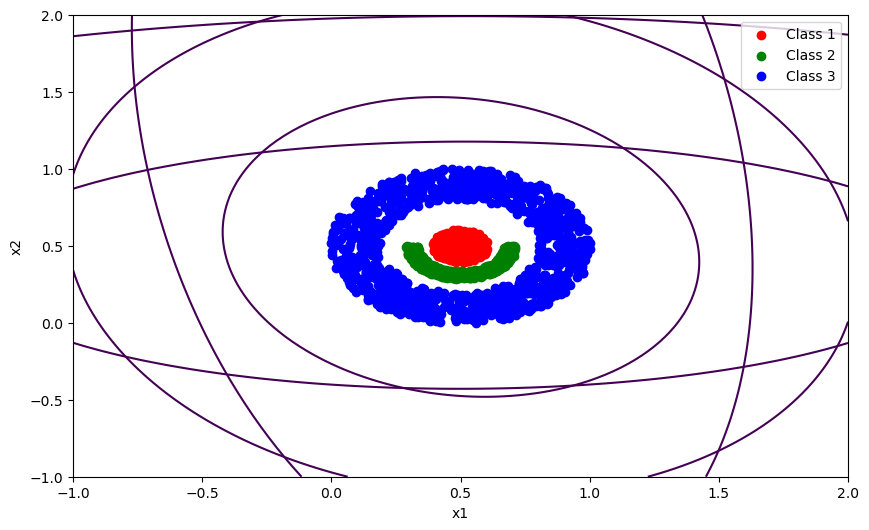

In [14]:

p2=c.plot_decision_boundaries_with_cov(cov_matrices,True)
p2

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


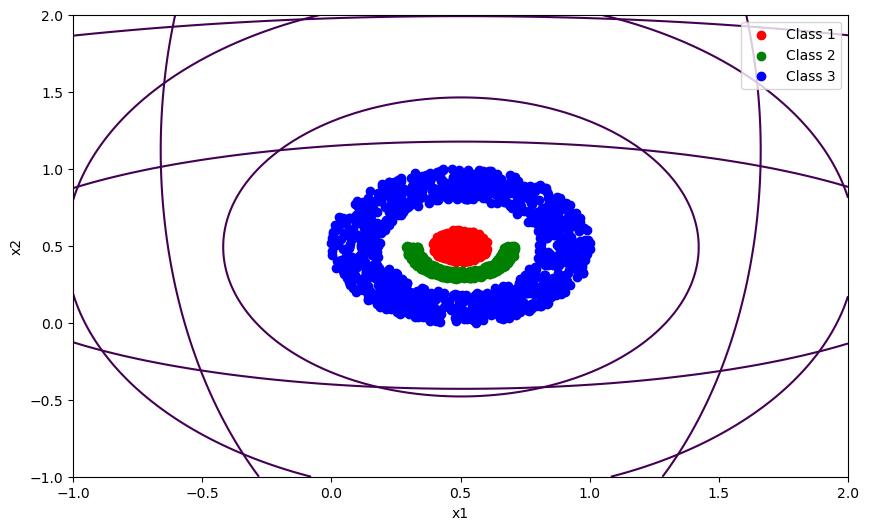

In [15]:

p4=c.plot_decision_boundaries_with_cov(z_cov_matrices,True)
p4

/home/savyasanchisharma/WinterInternship/BayesClassifier/Non Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


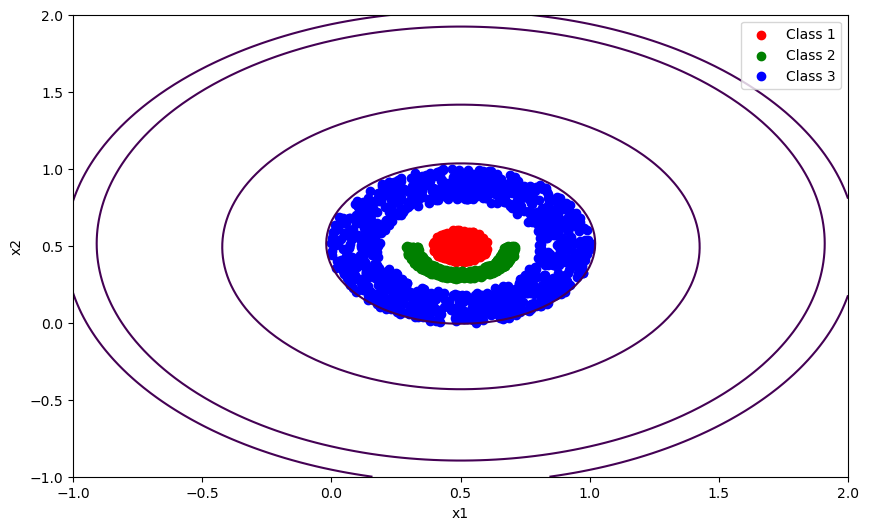

In [16]:

p6=c.plot_decision_boundaries_with_cov(d_cov_matrices,True)
p6